## Dataset

In [4]:
import pandas as pd

car_sales = pd.read_csv("data car.csv")
car_sales.drop(columns=['Car_id','Dealer_No ','Phone'],inplace=True)
print(car_sales.head())

       Date Customer Name Gender  Annual Income  \
0  1/2/2022     Geraldine   Male          13500   
1  1/2/2022           Gia   Male        1480000   
2  1/2/2022        Gianna   Male        1035000   
3  1/2/2022       Giselle   Male          13500   
4  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($) Body Style  \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000        SUV   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000        SUV   
2          Overhead Camshaft       Manual         Red      31500  Passe

## Cleaning data

In [5]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           23906 non-null  object
 1   Customer Name  23905 non-null  object
 2   Gender         23906 non-null  object
 3   Annual Income  23906 non-null  int64 
 4   Dealer_Name    23906 non-null  object
 5   Company        23906 non-null  object
 6   Model          23906 non-null  object
 7   Engine         23906 non-null  object
 8   Transmission   23906 non-null  object
 9   Color          23906 non-null  object
 10  Price ($)      23906 non-null  int64 
 11  Body Style     23906 non-null  object
 12  Dealer_Region  23906 non-null  object
dtypes: int64(2), object(11)
memory usage: 2.4+ MB


In [6]:
car_sales.isna().sum()

Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Body Style       0
Dealer_Region    0
dtype: int64

In [7]:
car_sales.dropna(inplace=True)
car_sales.isna().sum()
car_sales.duplicated().sum()
car_sales.describe()

,Annual Income,Price ($)
count,2.390500e+04,23905.000000
mean,8.308466e+05,28089.540473
std,7.200208e+05,14788.592495
min,1.008000e+04,1200.000000
25%,3.860000e+05,18001.000000
50%,7.350000e+05,23000.000000
75%,1.176000e+06,34000.000000
max,1.120000e+07,85800.000000


## Visualization

Which car makers sold the most? dan Which car makers earned the highest revenue?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11656\3362482281.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Sales', y='Company', data=most_selling_companies, palette='coolwarm')


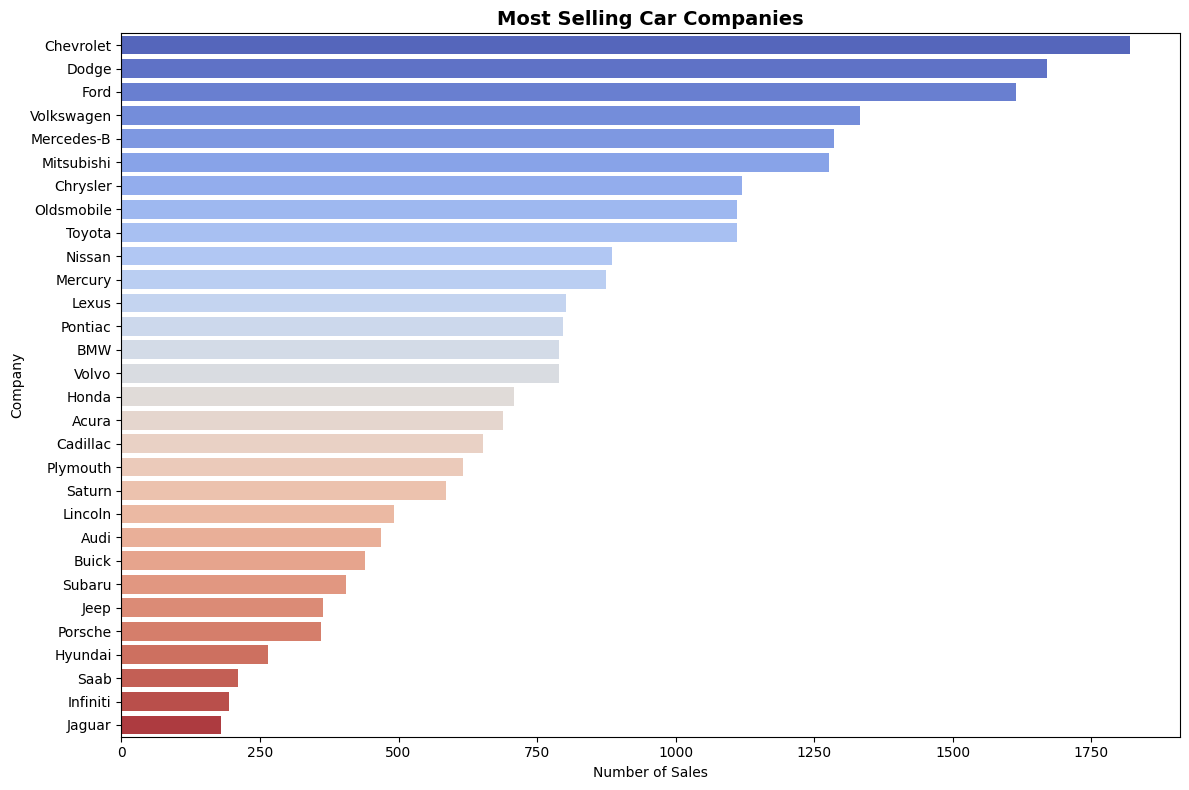

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11656\3362482281.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Revenue', y='Company', data=revenue_earner_companies, palette='coolwarm')


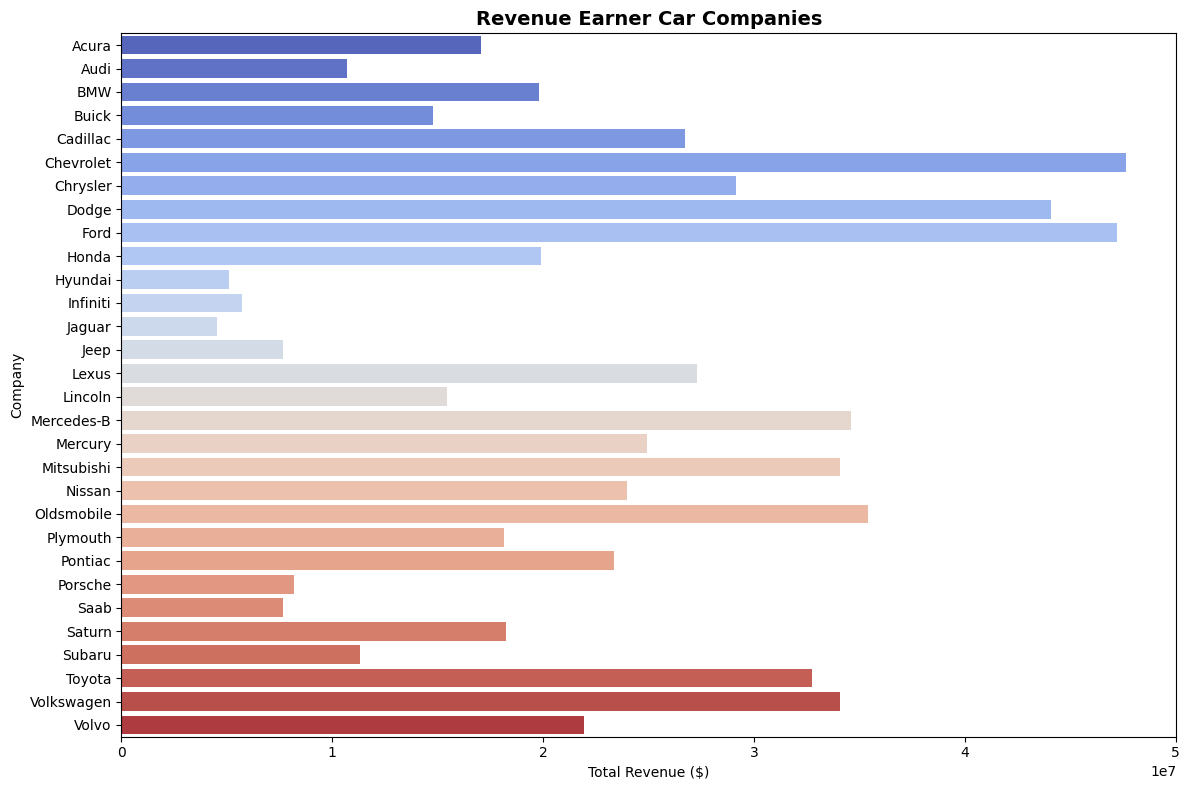

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Menghitung jumlah penjualan per perusahaan mobil (Company)
most_selling_companies = car_sales['Company'].value_counts().reset_index()
most_selling_companies.columns = ['Company', 'Number of Sales']

# Menghitung total pendapatan per perusahaan mobil (Company)
revenue_earner_companies = car_sales.groupby('Company')['Price ($)'].sum().reset_index()
revenue_earner_companies.columns = ['Company', 'Total Revenue']

# Visualisasi jumlah penjualan per perusahaan mobil
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Sales', y='Company', data=most_selling_companies, palette='coolwarm')
plt.title('Most Selling Car Companies', fontsize=14, fontweight='bold')
plt.xlabel('Number of Sales')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

# Visualisasi total pendapatan per perusahaan mobil
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Revenue', y='Company', data=revenue_earner_companies, palette='coolwarm')
plt.title('Revenue Earner Car Companies', fontsize=14, fontweight='bold')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

Hubungan antara penjualan mobil dengan harga mobil

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11656\226549304.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price Range', y='Number of Sales', data=sales_count_by_price_range, palette='coolwarm')


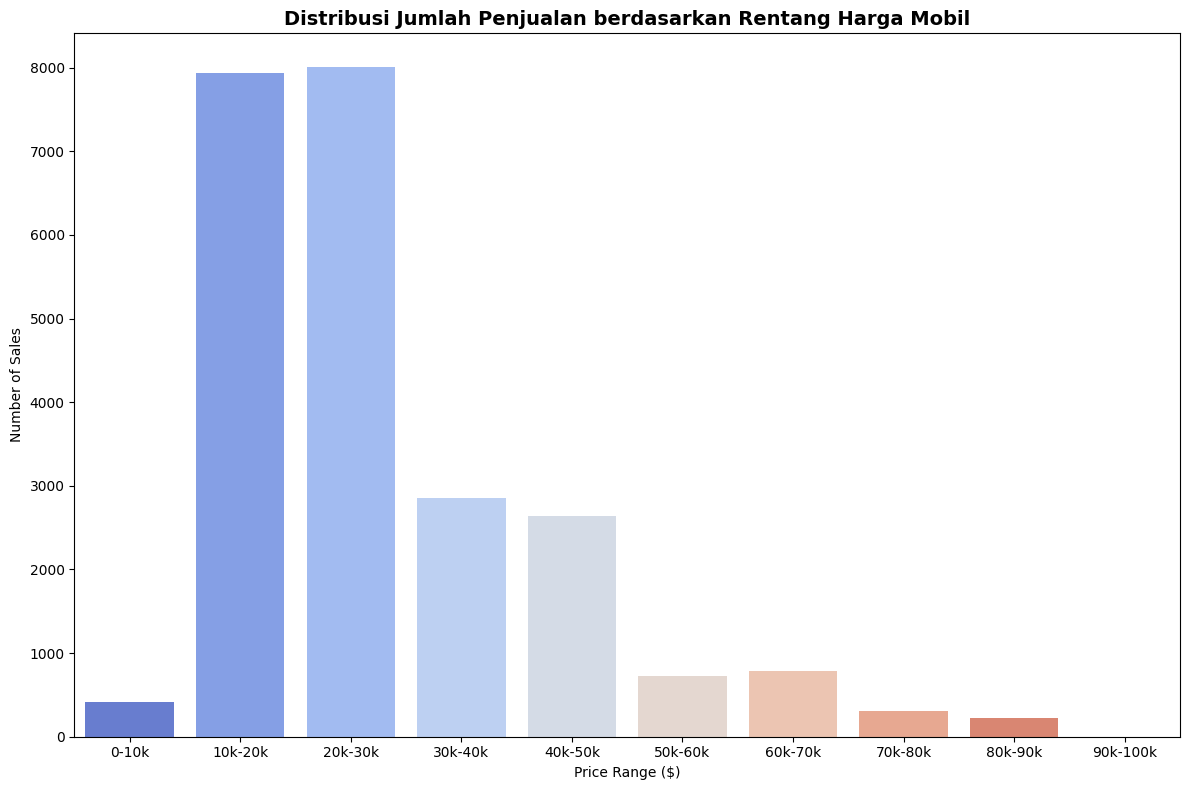

In [9]:
# Mengelompokkan harga mobil ke dalam beberapa rentang harga
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k', '90k-100k']
car_sales['Price Range'] = pd.cut(car_sales['Price ($)'], bins=bins, labels=labels)

# Menghitung jumlah penjualan dalam setiap rentang harga
sales_count_by_price_range = car_sales['Price Range'].value_counts().sort_index().reset_index()
sales_count_by_price_range.columns = ['Price Range', 'Number of Sales']

# Buat histogram untuk melihat distribusi jumlah penjualan berdasarkan rentang harga
plt.figure(figsize=(12, 8))
sns.barplot(x='Price Range', y='Number of Sales', data=sales_count_by_price_range, palette='coolwarm')
plt.title('Distribusi Jumlah Penjualan berdasarkan Rentang Harga Mobil', fontsize=14, fontweight='bold')
plt.xlabel('Price Range ($)')
plt.ylabel('Number of Sales')
plt.tight_layout()
plt.show()

Statistik Deskriptif Dasar:
       Annual Income     Price ($)
count   2.390500e+04  23905.000000
mean    8.308466e+05  28089.540473
std     7.200208e+05  14788.592495
min     1.008000e+04   1200.000000
25%     3.860000e+05  18001.000000
50%     7.350000e+05  23000.000000
75%     1.176000e+06  34000.000000
max     1.120000e+07  85800.000000


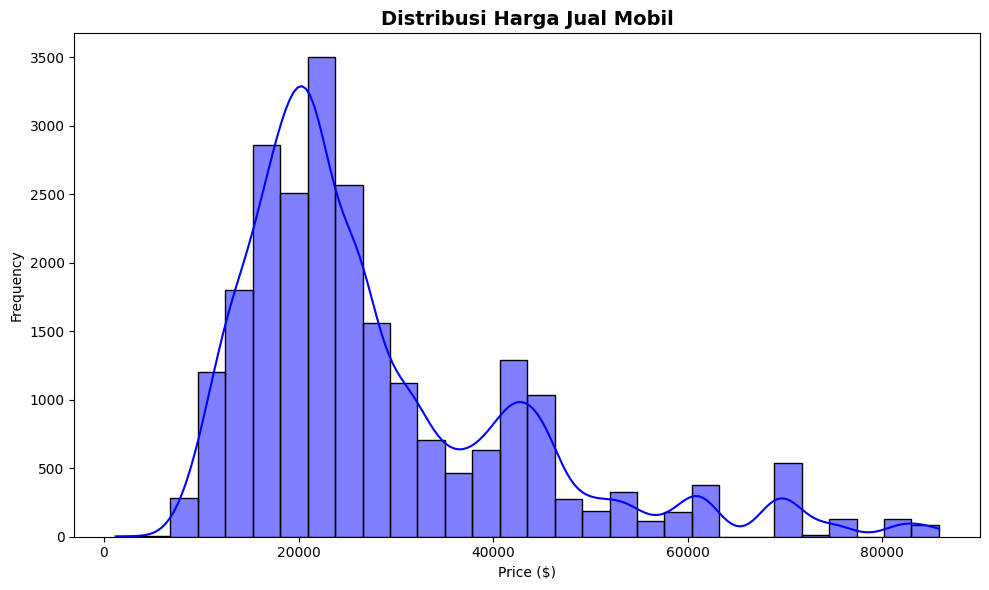

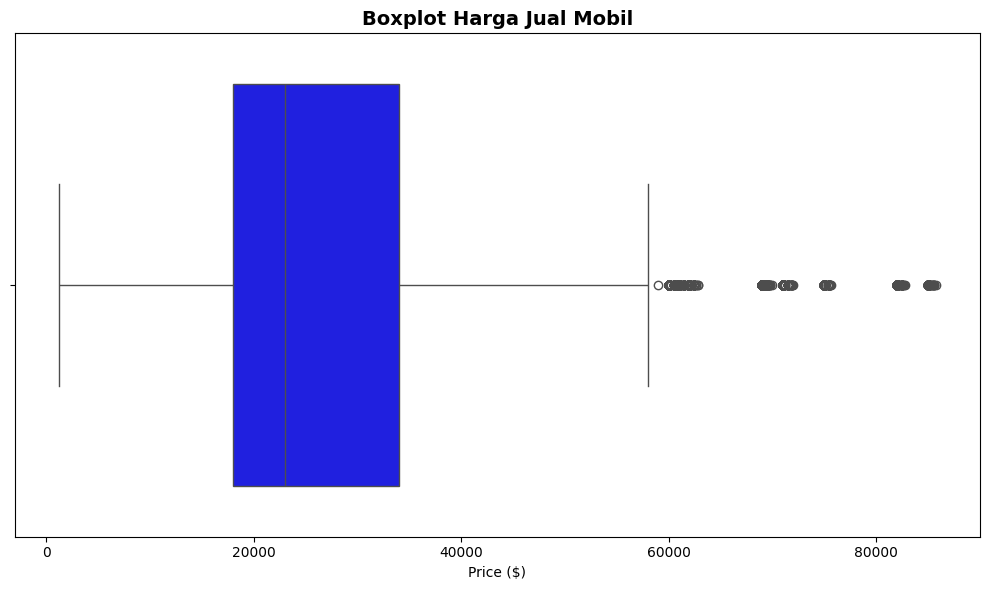

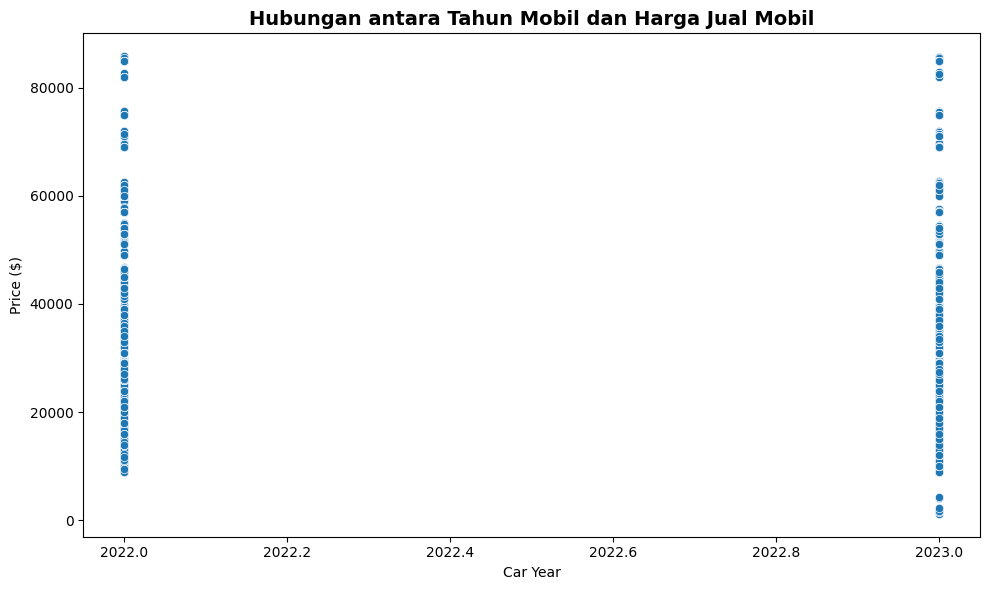

In [10]:
# Hitung statistik deskriptif dasar
descriptive_stats = car_sales.describe()
print("Statistik Deskriptif Dasar:")
print(descriptive_stats)

# Visualisasi distribusi harga jual mobil (Price ($)) menggunakan histogram
plt.figure(figsize=(10, 6))
sns.histplot(car_sales['Price ($)'], bins=30, kde=True, color='blue')
plt.title('Distribusi Harga Jual Mobil', fontsize=14, fontweight='bold')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualisasi distribusi harga jual mobil (Price ($)) menggunakan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price ($)', data=car_sales, color='blue')
plt.title('Boxplot Harga Jual Mobil', fontsize=14, fontweight='bold')
plt.xlabel('Price ($)')
plt.tight_layout()
plt.show()

# Convert 'Date' column to datetime format
car_sales['Date'] = pd.to_datetime(car_sales['Date'], format='%m/%d/%Y')

# Extract year from the Date column
car_sales['Car Year'] = car_sales['Date'].dt.year

# Visualisasi hubungan antara harga mobil (Price ($)) dan tahun mobil (Car Year) menggunakan scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Car Year', y='Price ($)', data=car_sales)
plt.title('Hubungan antara Tahun Mobil dan Harga Jual Mobil', fontsize=14, fontweight='bold')
plt.xlabel('Car Year')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()



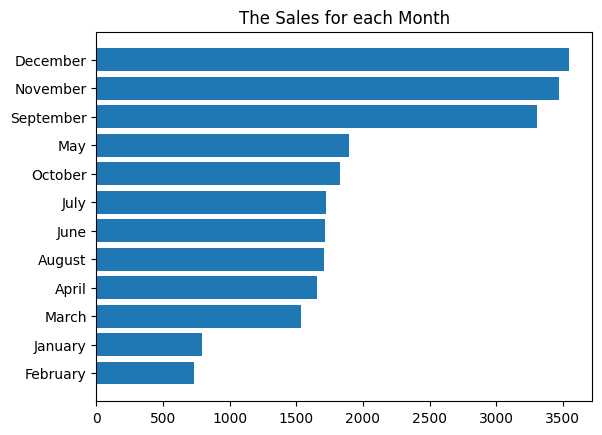

In [11]:
# what month have the most number of sales
tmp = car_sales['Date'].dt.month_name().value_counts().sort_values()
tmp
fig,ax = plt.subplots()
ax.barh(tmp.index,tmp)
ax.set_title('The Sales for each Month')
plt.show()

(np.float64(-1.0999999438970456),
 np.float64(1.0999998917191285),
 np.float64(-1.099999583337094),
 np.float64(1.0999929937313562))

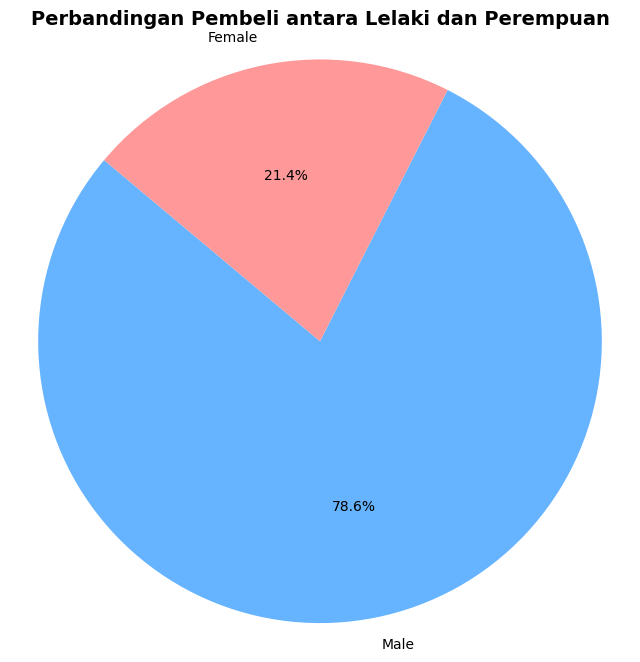

In [12]:
# Hitung jumlah pembeli berdasarkan jenis kelamin
gender_counts = car_sales['Gender'].value_counts()

# Buat pie chart untuk membandingkan jumlah pembeli lelaki dan perempuan
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Perbandingan Pembeli antara Lelaki dan Perempuan', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11656\2518970305.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price ($)', y='Company', data=car_sales, palette='coolwarm')


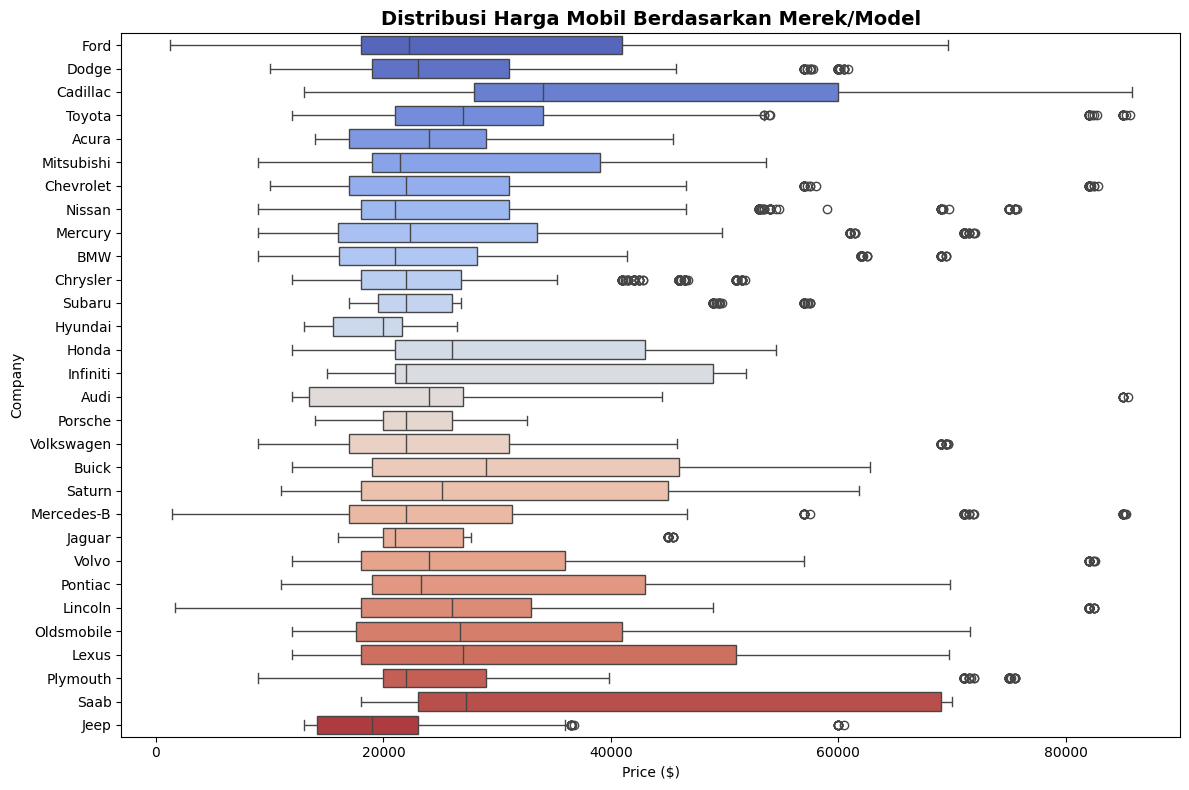

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11656\2518970305.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Color', data=car_sales, order=car_sales['Color'].value_counts().index, palette='coolwarm')


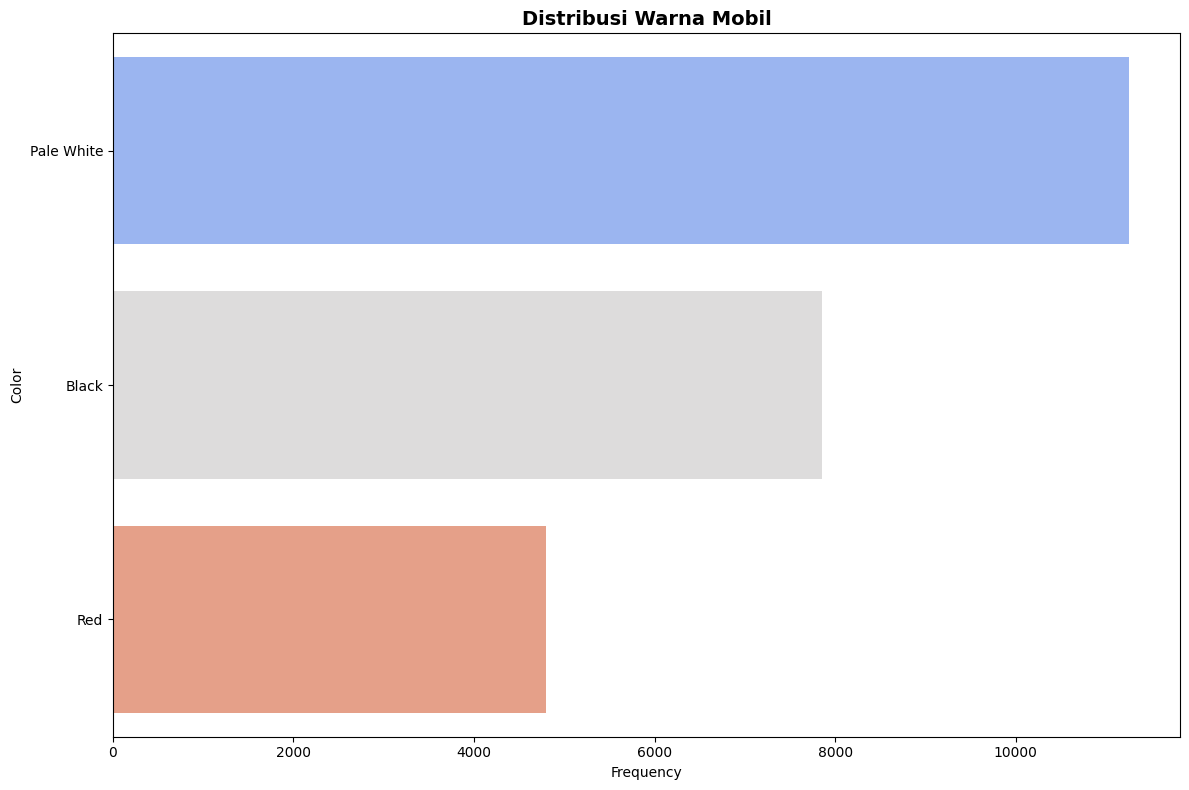

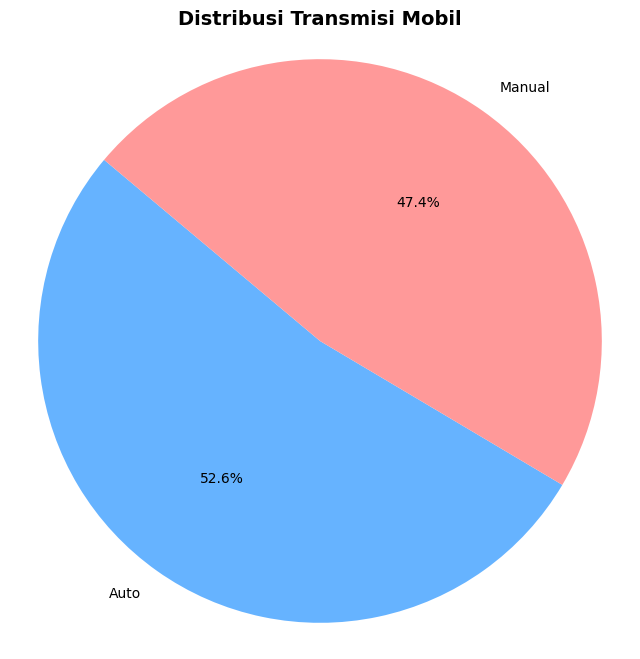

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11656\2518970305.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Dealer_Region', data=car_sales, order=car_sales['Dealer_Region'].value_counts().index, palette='coolwarm')


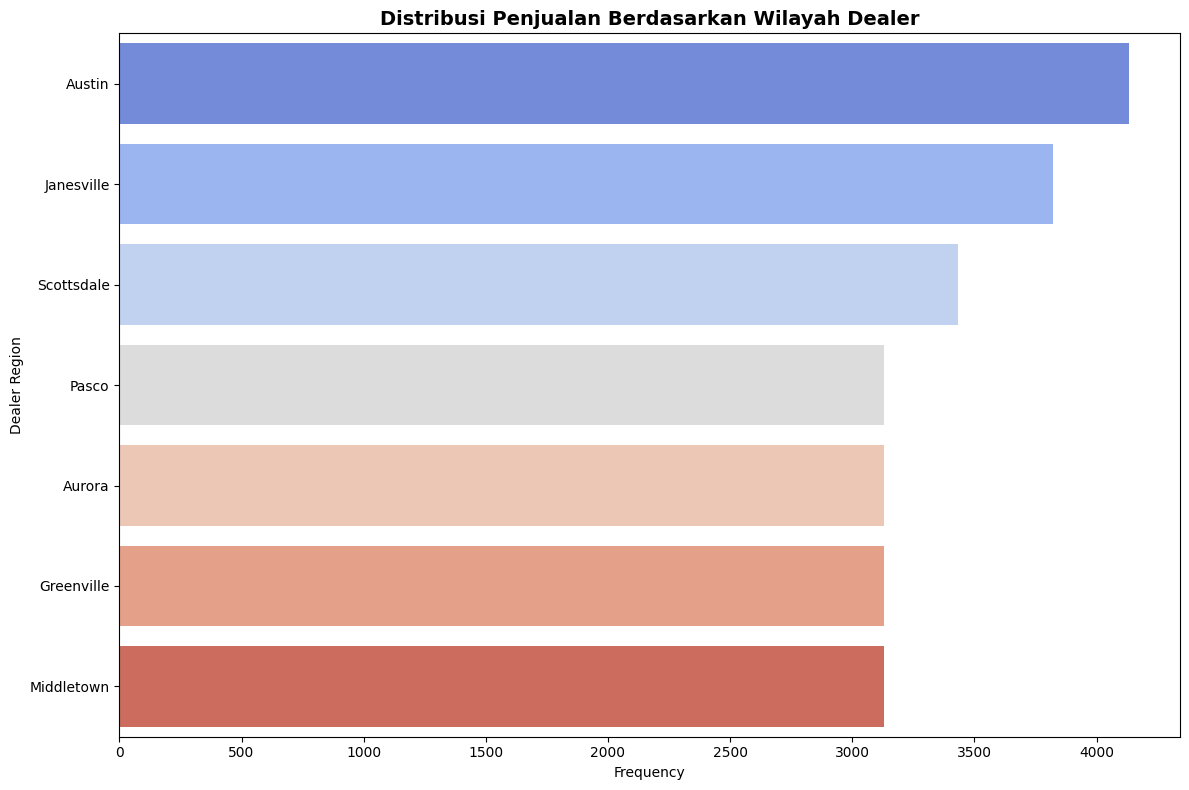

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11656\2518970305.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price ($)', y='Body Style', data=car_sales, palette='coolwarm')


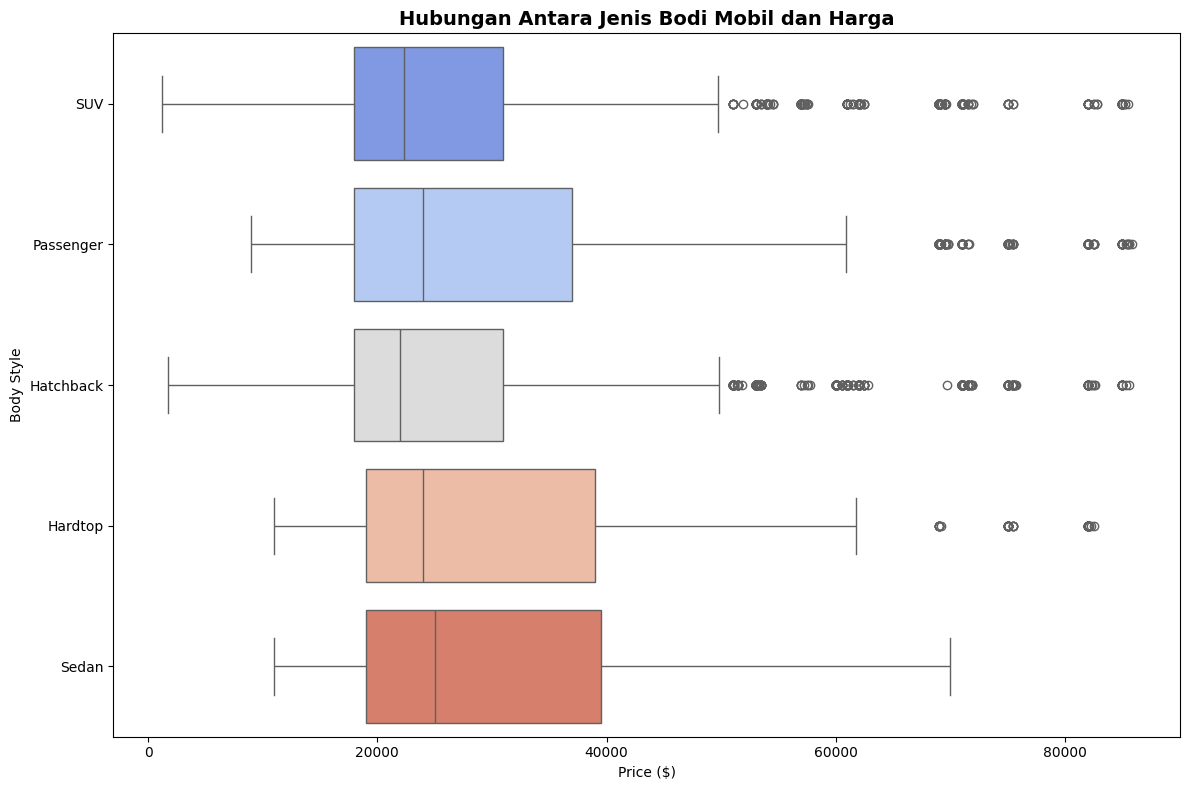

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11656\2518970305.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dealer_Region', y='Annual Income', data=car_sales, palette='coolwarm', estimator=lambda x: sum(x) / len(x))


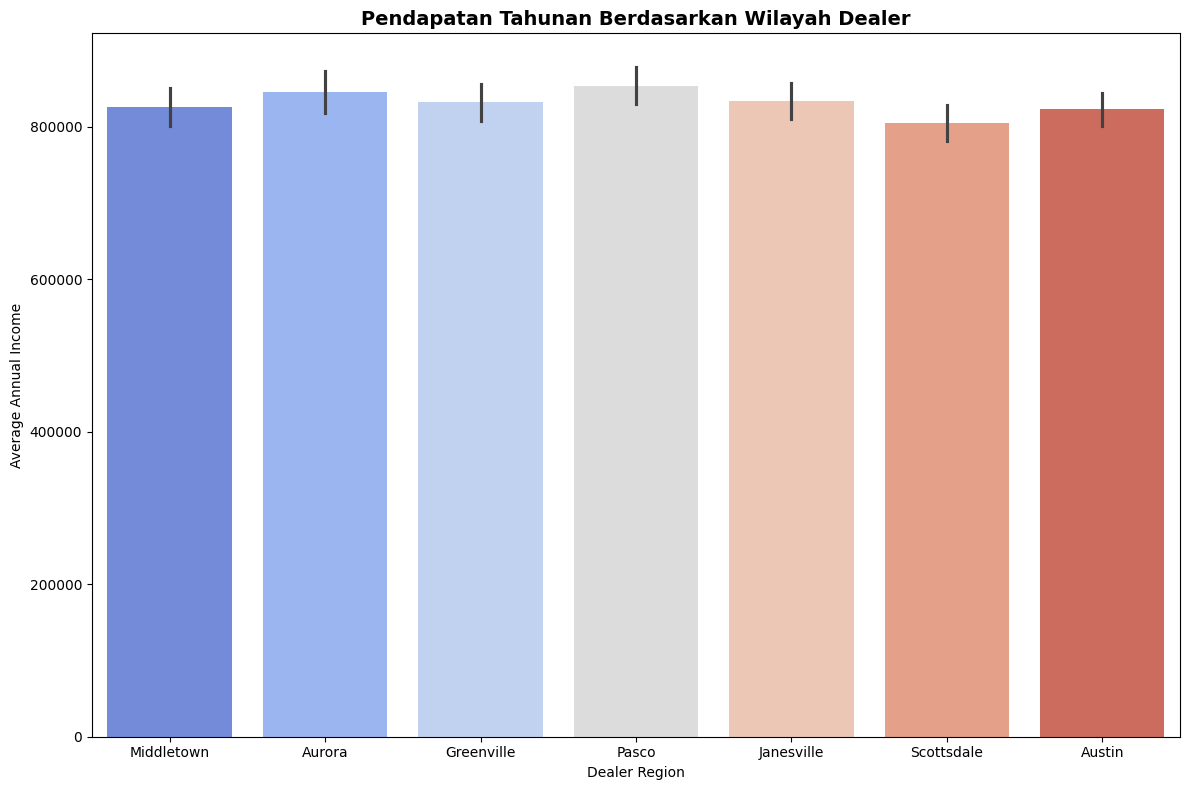

In [13]:
# Distribusi Harga Mobil Berdasarkan Merek/Model
plt.figure(figsize=(12, 8))
sns.boxplot(x='Price ($)', y='Company', data=car_sales, palette='coolwarm')
plt.title('Distribusi Harga Mobil Berdasarkan Merek/Model', fontsize=14, fontweight='bold')
plt.xlabel('Price ($)')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

# Distribusi Warna Mobil
plt.figure(figsize=(12, 8))
sns.countplot(y='Color', data=car_sales, order=car_sales['Color'].value_counts().index, palette='coolwarm')
plt.title('Distribusi Warna Mobil', fontsize=14, fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('Color')
plt.tight_layout()
plt.show()

# Distribusi Transmisi Mobil
transmission_counts = car_sales['Transmission'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Distribusi Transmisi Mobil', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Distribusi Penjualan Berdasarkan Wilayah Dealer
plt.figure(figsize=(12, 8))
sns.countplot(y='Dealer_Region', data=car_sales, order=car_sales['Dealer_Region'].value_counts().index, palette='coolwarm')
plt.title('Distribusi Penjualan Berdasarkan Wilayah Dealer', fontsize=14, fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('Dealer Region')
plt.tight_layout()
plt.show()

# Hubungan Antara Jenis Bodi Mobil dan Harga
plt.figure(figsize=(12, 8))
sns.boxplot(x='Price ($)', y='Body Style', data=car_sales, palette='coolwarm')
plt.title('Hubungan Antara Jenis Bodi Mobil dan Harga', fontsize=14, fontweight='bold')
plt.xlabel('Price ($)')
plt.ylabel('Body Style')
plt.tight_layout()
plt.show()

# Pendapatan Tahunan Berdasarkan Wilayah Dealer
plt.figure(figsize=(12, 8))
sns.barplot(x='Dealer_Region', y='Annual Income', data=car_sales, palette='coolwarm', estimator=lambda x: sum(x) / len(x))
plt.title('Pendapatan Tahunan Berdasarkan Wilayah Dealer', fontsize=14, fontweight='bold')
plt.xlabel('Dealer Region')
plt.ylabel('Average Annual Income')
plt.tight_layout()
plt.show()